<a href="https://colab.research.google.com/github/akise-cyber/DeepLeraningClassify/blob/main/Classifica%C3%A7%C3%A3oDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #bibliotecas
import random
import spacy
import pandas as pd
import seaborn as sns
from spacy.util import minibatch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
 #Datasheet
data_path = "https://raw.githubusercontent.com/qodatecnologia/spam-data/main/spam-data.csv"
data = pd.read_csv(data_path)
print(data.head())

     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]


In [3]:
data = pd.read_csv(data_path)
observations = len(data.index)
print(f"Tamanho do Dataset: {observations}\n")
print(data['v1'].value_counts())
print()
print(data['v1'].value_counts() / len(data.index) * 100.0)

Tamanho do Dataset: 5572

ham     4825
spam     747
Name: v1, dtype: int64

ham     86.593683
spam    13.406317
Name: v1, dtype: float64


In [4]:
# Criar um modelo vazio com o idioma dataset
nlp = spacy.blank("en")

# Criar um classificador de texto com classes exclusivas + arquitetura "bow" 
text_cat = nlp.create_pipe(
              "textcat",
              config={
                "exclusive_classes": True,
                "architecture": "bow"})

# Adicionar um classificador a nosso modelo vazio
nlp.add_pipe(text_cat)

# Colocar as classes
text_cat.add_label("ham")
text_cat.add_label("spam")

1

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
      data['v2'], data['v1'], test_size=0.33, random_state=7)

In [6]:
train_lables = [{'cats': {'ham': label == 'ham',
                          'spam': label == 'spam'}}  for label in y_train]

test_lables = [{'cats': {'ham': label == 'ham',
                      'spam': label == 'spam'}}  for label in y_test]

# Usar spacy model data
train_data = list(zip(x_train, train_lables))
test_data = list(zip(x_test, test_lables))

In [8]:
def train_model(model, train_data, optimizer, batch_size, epochs=10):
    losses = {}
    random.seed(1)

    for epoch in range(epochs):
        random.shuffle(train_data)

        batches = minibatch(train_data, size=batch_size)
        for batch in batches:
            
            texts, labels = zip(*batch)

            model.update(texts, labels, sgd=optimizer, losses=losses)
        print("Loss: {}".format(losses['textcat']))

    return losses['textcat']

In [9]:
optimizer = nlp.begin_training()
batch_size = 5
epochs = 10

#TRAIN
train_model(nlp, train_data, optimizer, batch_size, epochs)

Loss: 3.9675071447882146
Loss: 4.947752934833176
Loss: 5.475570609709221
Loss: 5.8221963234604885
Loss: 6.054016676907645
Loss: 6.198435771319279
Loss: 6.297653178926925
Loss: 6.367637058164786
Loss: 6.424966427345702
Loss: 6.471268548712159


6.471268548712159

In [10]:
print(train_data[0])
sample_test = nlp(train_data[0][0])
print(sample_test.cats)

('Remember all those whom i hurt during days of satanic imposter in me.need to pay a price,so be it.may destiny keep me going and as u said pray that i get the mind to get over the same.', {'cats': {'ham': True, 'spam': False}})
{'ham': 0.9999992847442627, 'spam': 7.569625495307264e-07}


In [11]:
def get_predictions(model, texts):
    # Lógica e Token
    docs = [model.tokenizer(text) for text in texts]

    # textcat para verificar os scores
    textcat = model.get_pipe('textcat')
    scores, _ = textcat.predict(docs)

    # Usar argmax para os scores mais altos
    predicted_labels = scores.argmax(axis=1)
    predicted_class = [textcat.labels[label] for label in predicted_labels]

    return predicted_class

In [12]:
# ACURÁCIA
train_predictions = get_predictions(nlp, x_train)
test_predictions = get_predictions(nlp, x_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.998928475756764
Test accuracy: 0.9815116911364872


TREINO:


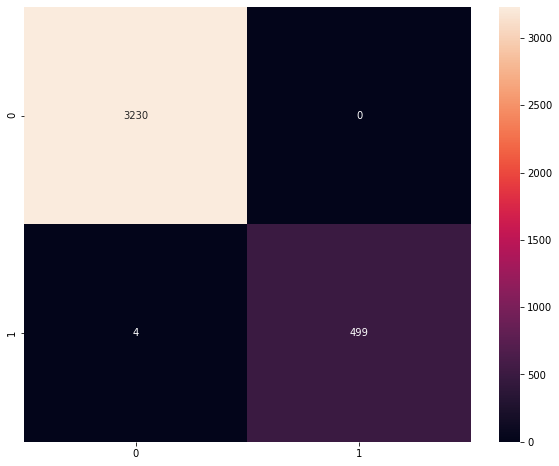

In [14]:
# Tentar confusão de treino
print("TREINO:")
cf_train_matrix = confusion_matrix(y_train, train_predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d')

TESTE:


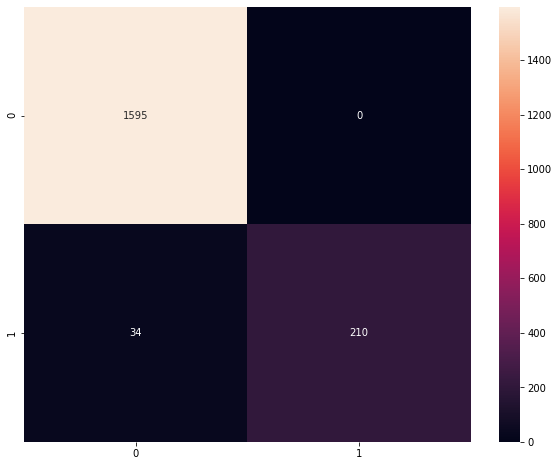

In [13]:
# Confusão de teste
print("TESTE:")
cf_test_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cf_test_matrix, annot=True, fmt='d')